# Copy The Image Dataset of ECG

In [1]:
!git clone "https://github.com/srajan-kiyotaka/Heart-Disease-Classifier"

Cloning into 'Heart-Disease-Classifier'...
remote: Enumerating objects: 507, done.
remote: Counting objects: 100% (507/507), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 507 (delta 436), reused 505 (delta 436), pack-reused 0
Receiving objects: 100% (507/507), 77.33 MiB | 34.22 MiB/s, done.
Resolving deltas: 100% (436/436), done.
Checking out files: 100% (929/929), done.


# Store The Images in The List

In [2]:
# import opencv
import cv2

# store list
image = []
lables = []

## Normal Person ECG ##
for i in range(1, 285):
    img = cv2.imread(f"/content/Heart-Disease-Classifier/Dataset/Normal Person ECG Images (284x12=3408)/Normal({i}).jpg")
    image.append(img)
    lables.append(0)  # Normal

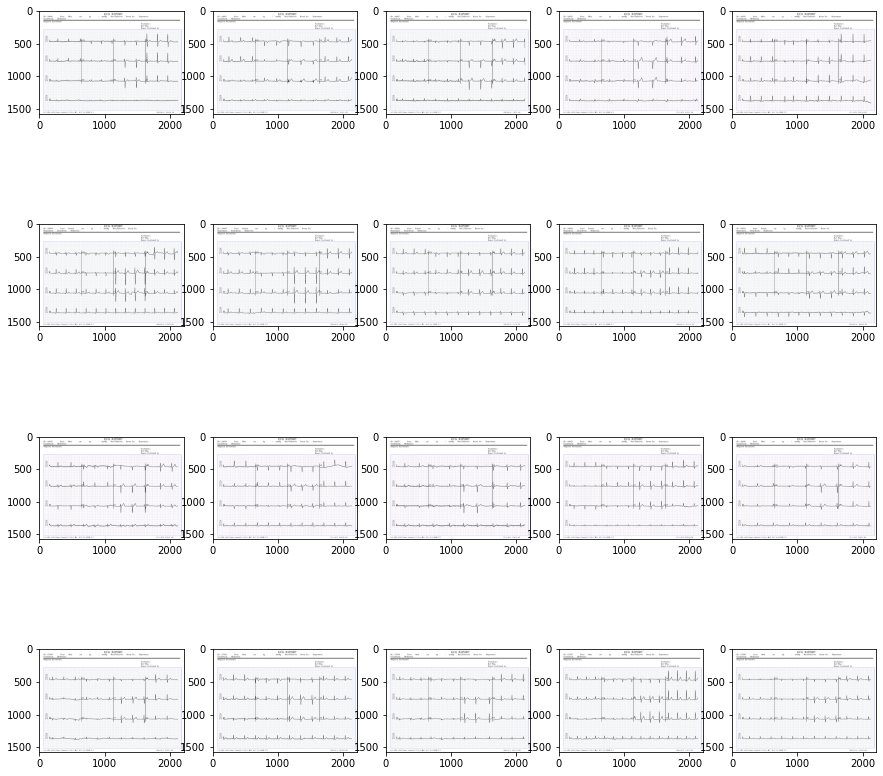

In [3]:
# Sample Images

import matplotlib.pyplot as plt

plt.figure(figsize = (15,15))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image[10 + i*3])
plt.show()

In [4]:
## Myocardial Infected Person ECG ##

for i in range(1, 240):
    img = cv2.imread(f"/content/Heart-Disease-Classifier/Dataset/ECG Images of Myocardial Infarction Patients (240x12=2880)/MI({i}).jpg")
    image.append(img)
    lables.append(1)  # Myocardial

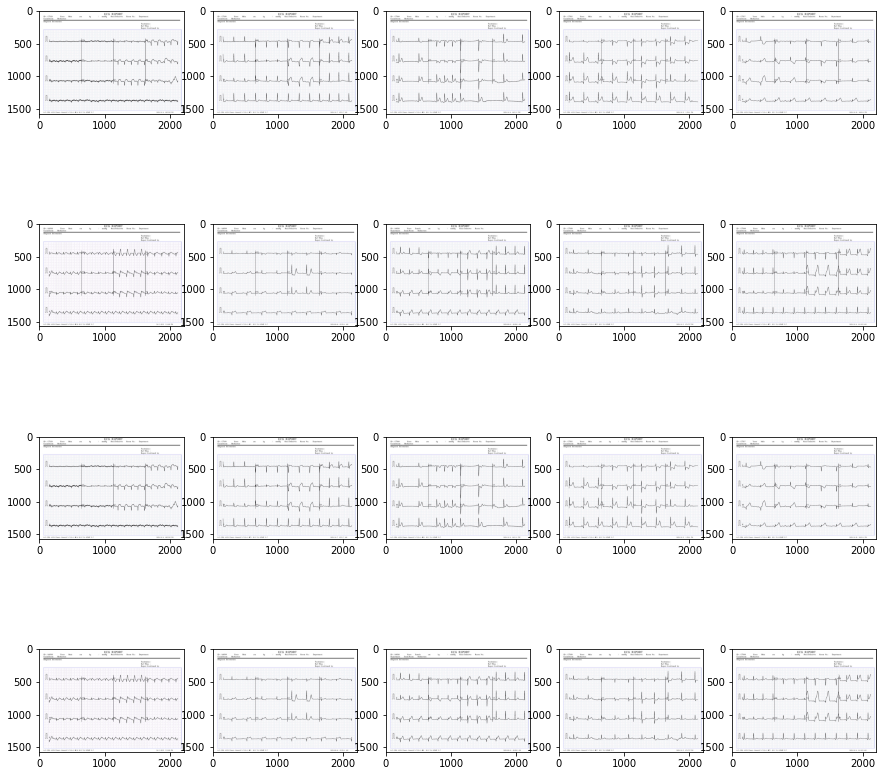

In [5]:
# Sample Images 

plt.figure(figsize = (15,15))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image[300 + i*3])
plt.show()

In [6]:
## MI Infected Person ECG ##

for i in range(1, 173):
    img = cv2.imread(f"/content/Heart-Disease-Classifier/Dataset/ECG Images of Patient that have History of MI (172x12=2064)/PMI({i}).jpg")
    image.append(img)
    lables.append(2)    # MI

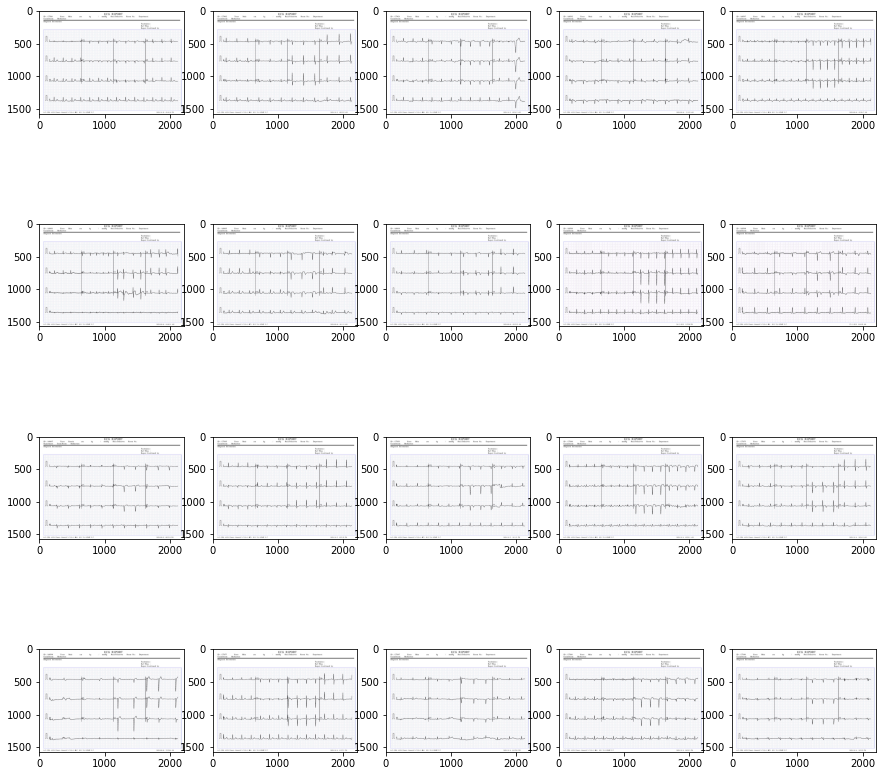

In [7]:
# Sample Images 

plt.figure(figsize = (15,15))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image[600 + i*3])
plt.show()

In [8]:
## Abnormal Heartbeat Infected Person ECG ##

for i in range(1, 234):
    img = cv2.imread(f"/content/Heart-Disease-Classifier/Dataset/ECG Images of Patient that have abnormal heartbeat (233x12=2796)/HB({i}).jpg")
    image.append(img)
    lables.append(3)   # Abnormal Heartbeat

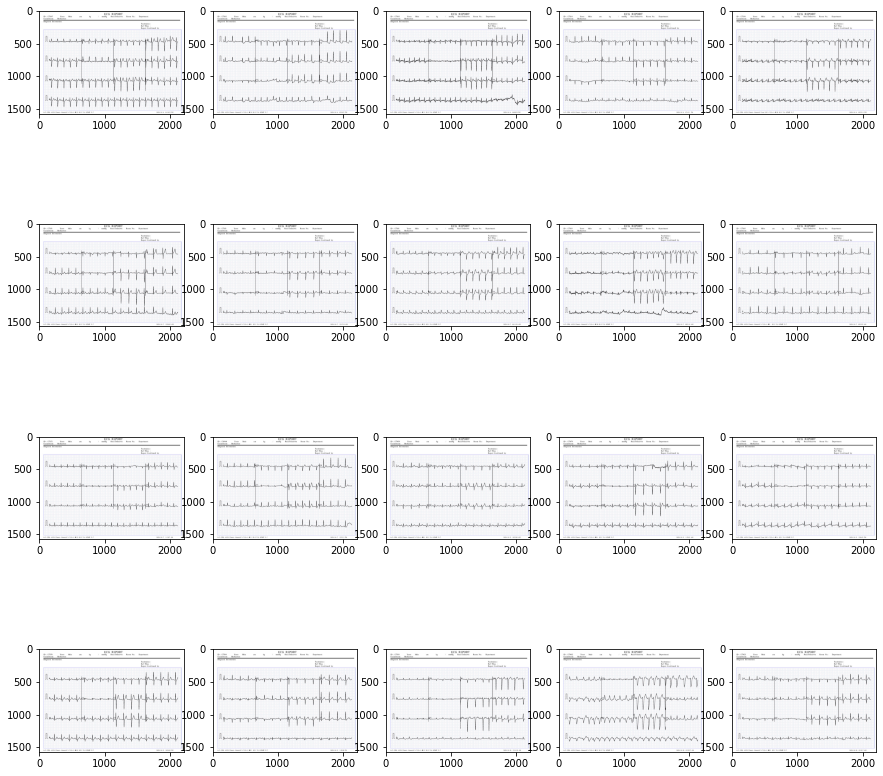

In [9]:
# Sample Images 

plt.figure(figsize = (15,15))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image[800 + i*3])
plt.show()

In [10]:
# Shape of the image

image[1].shape

(1572, 2213, 3)

In [11]:
# Function To PreProcess The Images #

def preprocessing(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray = gray/255
    gray = cv2.resize(gray,(240, 200))
    return gray

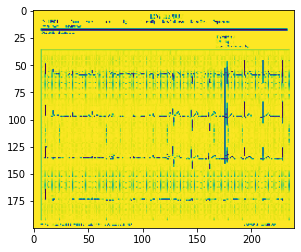

In [12]:
# PreProcessed Images #

plt.imshow(preprocessing(image[3]))
plt.show()

In [13]:
# PreProcess All The Images

image_dataset = []

i = 0

for img in image:
    gray_img = preprocessing(img)
    image_dataset.append(gray_img)


In [14]:
# PreProcessed Image Shape
image_dataset[498].shape

# Free Up The Excess Memory
image = []

In [15]:
# Convert The List into Array Format

import numpy as np

train_feature = np.array(image_dataset)
lables = np.array(lables)

In [16]:
## Display Array Shape ##

print(f"image dataset shape = {train_feature.shape}")

print(f"lable dataset shape = {lables.shape}")

image dataset shape = (928, 200, 240)
lable dataset shape = (928,)


## Split The Dataset into Test and Train 

In [17]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_target, test_target = train_test_split(train_feature,lables,test_size=0.2)

print(f"train_features shape = {train_features.shape}")

print(f"test_features shape = {test_features.shape}")

print(f"train_target shape = {train_target.shape}")

print(f"test_target shape = {test_target.shape}")

train_features shape = (742, 200, 240)
test_features shape = (186, 200, 240)
train_target shape = (742,)
test_target shape = (186,)


## Deep Learning CNN Model

In [18]:
# MODEL ARCHITECTURE

import keras
import tensorflow
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

# ONE NOT ENCODING

train_target = to_categorical(lables)

# MODEL LAYERS

model=Sequential()
# Convolutional Layers
model.add(Conv2D(50, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu', input_shape = (200, 240, 1)))

model.add(Conv2D(75, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(200,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 240, 50)      500       
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 240, 75)      33825     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 120, 75)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 900000)            0         
                                                                 
 dense (Dense)               (None, 500)               450000500 
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                        

In [19]:
# MODEL COPILE

from tensorflow.keras.optimizers import Adam

model.compile(Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
# MODEL FITTING

model.fit(train_feature, train_target, epochs = 15)

Epoch 1/15
29/29 [==============================] - 28s 549ms/step - loss: 3.3061 - accuracy: 0.2899
Epoch 2/15
29/29 [==============================] - 16s 549ms/step - loss: 1.3487 - accuracy: 0.3459
Epoch 3/15
29/29 [==============================] - 16s 552ms/step - loss: 0.7942 - accuracy: 0.7047
Epoch 4/15
29/29 [==============================] - 16s 551ms/step - loss: 0.2628 - accuracy: 0.9192
Epoch 5/15
29/29 [==============================] - 16s 552ms/step - loss: 0.0579 - accuracy: 0.9817
Epoch 6/15
29/29 [==============================] - 16s 551ms/step - loss: 0.0306 - accuracy: 0.9903
Epoch 7/15
29/29 [==============================] - 16s 550ms/step - loss: 0.0148 - accuracy: 0.9957
Epoch 8/15
29/29 [==============================] - 16s 550ms/step - loss: 0.0059 - accuracy: 0.9989
Epoch 9/15
29/29 [==============================] - 16s 551ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 10/15
29/29 [==============================] - 16s 551ms/step - loss: 0.0011 - accura

In [21]:
# Test our Model

predictions = model.predict(test_features)

In [22]:
# Accuracy of Our Model #

wrong = 0

for i in range(186) :
    test = np.argmax(predictions[i])
    train = test_target[i]
    if (test != train):
        wrong += 1

print(f"Model Accuracy : {((186 - wrong)/186)*100} %")

Model Accuracy : 100.0 %
